# About:
- this notebook visualises the change in F1 score and exact match as max_length increases

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
path = r"C:\Users\tanch\Documents\GitHub\URECA-CovidQA-Research\Research\RAM\max_length performance.csv"
onSQUAD = pd.read_csv(path)

In [7]:
path = r"C:\Users\tanch\Documents\GitHub\URECA-CovidQA-Research\Research\RAM\max_length performance on covidQA.csv"
onCovidQA = pd.read_csv(path)

In [8]:
model_size = {'albert-base-v1': 11094530,
 'bert-base-uncased': 108893186,
 'bert-base-cased': 107721218,
 'distilbert-base-uncased': 66364418,
 'roberta-base': 124056578,
 'distilroberta-base': 81529346,
 'google/electra-base-discriminator': 108893186}
model_size = dict(sorted(model_size.items(), key = lambda item: item[1],reverse = True))

In [9]:
def clean(df):
    df = df[df.model != "squeezebert/squeezebert-uncased"]
    df = df[df.model != "albert-xlarge-v1"]
    #df["model_size"] = df.model.map(model_size)
    df.sort_values(by = ["model", "max_length"], inplace = True)
    df.reset_index(drop = True, inplace = True)
    #df["model_size_rank"] = df.model_size.map(dict(zip(sorted(model_size.values()),range(len(model_size)))))
    return df

In [10]:
onCovidQA = clean(onCovidQA)
onSQUAD = clean(onSQUAD)

### Comparing model sizes

In [11]:
sns.set_palette("Dark2")

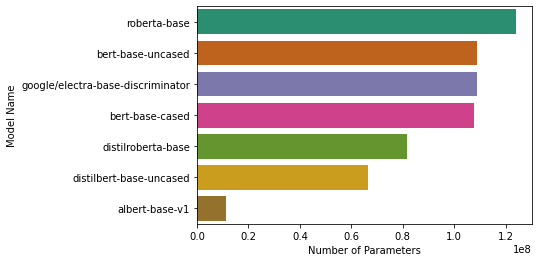

In [12]:
temp_df = pd.DataFrame({"model":model_size.keys(),
                        "num_params":model_size.values()})
sns.barplot(data = temp_df,
           y = 'model',
           x = 'num_params',
           hue_order = model_size.keys()).set(xlabel = "Number of Parameters", ylabel = "Model Name")
plt.savefig(r'C:\Users\tanch\Documents\GitHub\URECA-CovidQA-Research\Research\RAM\model_sizes.png')

### Comparing performance over varied max_length

[Text(0.5, 1.0, 'Performance on CovidQA')]

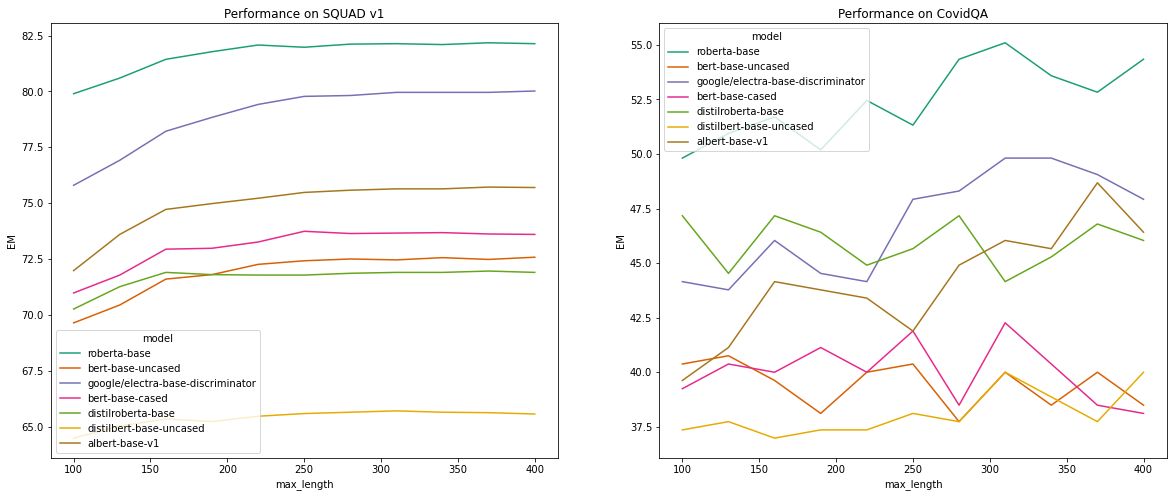

In [13]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data = onSQUAD, 
             x = "max_length", 
             y = "EM" , 
             hue = "model", 
             #size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[0]).set(title = "Performance on SQUAD v1")
sns.lineplot(data = onCovidQA, 
             x = "max_length", 
             y = "EM" , 
             hue = "model", 
            # size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[1]).set(title = "Performance on CovidQA")

[Text(0.5, 1.0, 'Performance on CovidQA')]

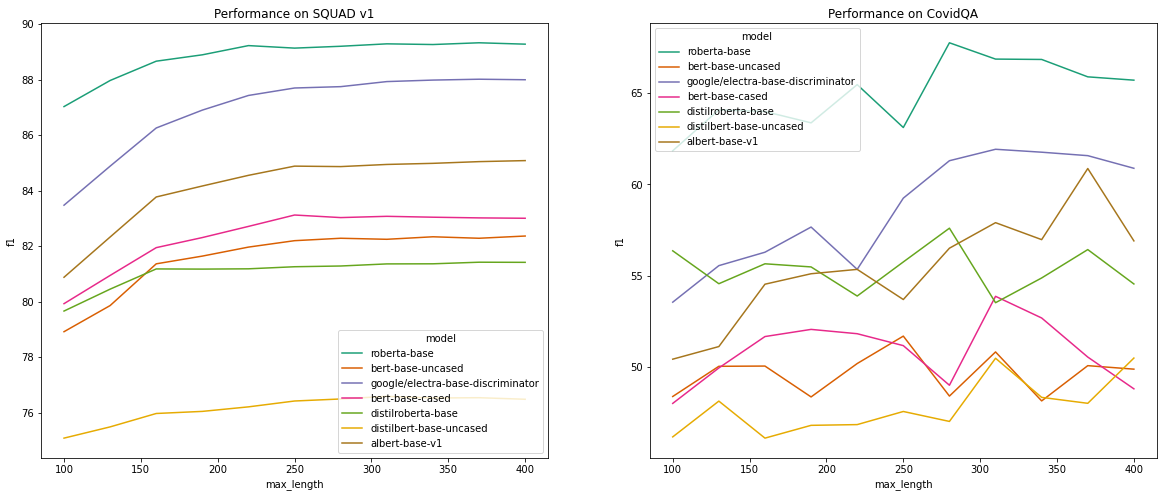

In [14]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data = onSQUAD, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
             #size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[0]).set(title = "Performance on SQUAD v1")
sns.lineplot(data = onCovidQA, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
            # size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[1]).set(title = "Performance on CovidQA")

# Observations:
- Models tend to perform better as max_length increase  - likely due to more context available
- in squad, performance plateaus at around 250
- in covidQA, there is much greater fluctuation in performance as max_length increases
- Among these models, roberta is the clear winner in terms of EM and f1 - though also has the most parameters
- ELECTRA clearly outperforms original BERT on both EM and f1 though they only differ in pre-training task
    - this supports the notion that replaced token detection is superior (greater sample efficiency) to MLM
- in terms of size and performance ratio, albert is the clear winner;though it has the smallest number of parameters, it is still the top 3 in EM and f1

In [15]:
temp_df = pd.DataFrame()
temp_df['model'] = onCovidQA['model']
temp_df['EM_average_change'] = onCovidQA['EM'] - onSQUAD['EM']
temp_df['f1_average_change'] = onCovidQA['f1'] - onSQUAD['f1']
temp_df  = temp_df.groupby(['model']).mean()
temp_df  = temp_df.reset_index(drop=False)
temp_df = pd.melt(temp_df, id_vars = "model" , value_vars = ["EM_average_change","f1_average_change"])

[Text(0.5, 1.0, 'Performance decrease from SQUAD to CovidQA')]

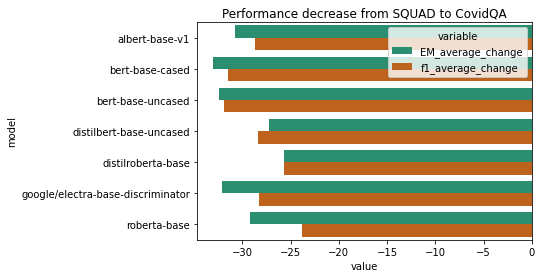

In [16]:
sns.barplot(data = temp_df, x = "value",  y = "model", hue = "variable").set(title = "Performance decrease from SQUAD to CovidQA")

# Observations:
- distillation tends to have a smaller drop in performance from squad to unseen data (covidQA)
- roberta has the smallest drop in f1
- distil-roberta has the smallest drop in EM

## Other Plots

[Text(0.5, 1.0, 'Performance on CovidQA')]

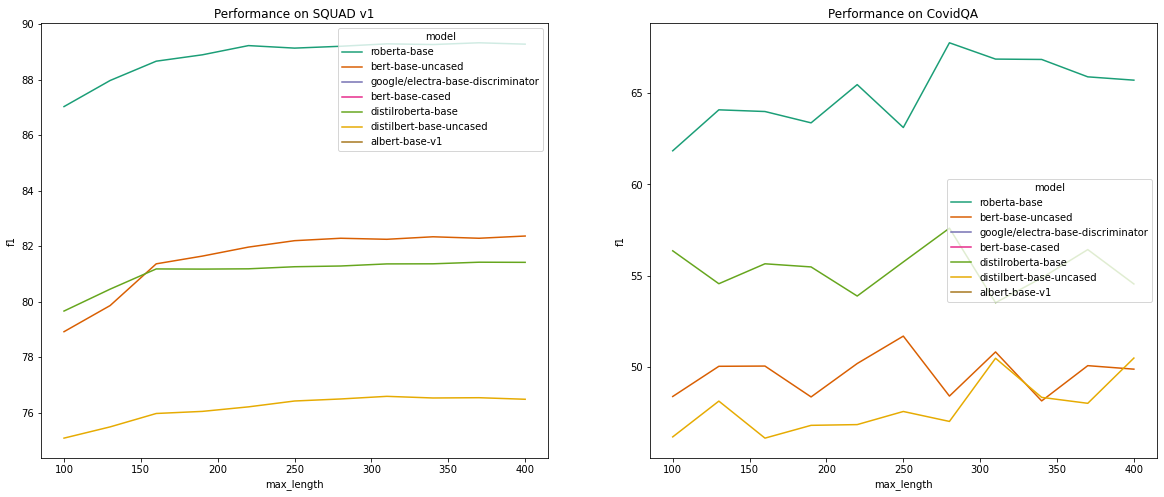

In [17]:
# distill vs no distil
models_to_view = ['roberta-base','distilroberta-base','distilbert-base-uncased','bert-base-uncased']
subset_squad = onSQUAD[onSQUAD.model.isin(models_to_view)]
subset_covidQA = onCovidQA[onCovidQA.model.isin(models_to_view)]

fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data = subset_squad, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
             #size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[0]).set(title = "Performance on SQUAD v1")
sns.lineplot(data = subset_covidQA, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
            # size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[1]).set(title = "Performance on CovidQA")

[Text(0.5, 1.0, 'Performance on CovidQA'), (45.0, 55.0)]

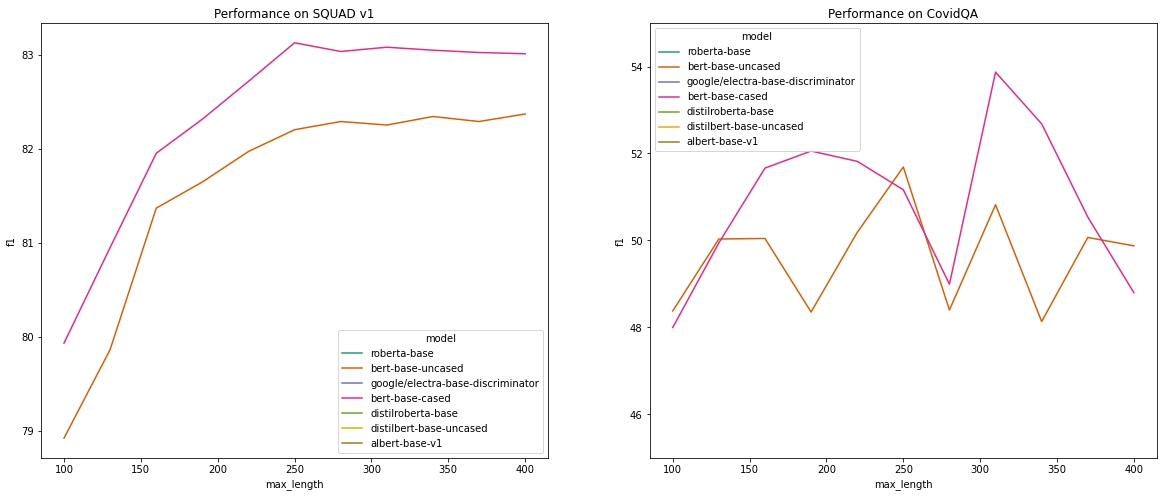

In [18]:
# case vs uncased
models_to_view = ['bert-base-cased', 'bert-base-uncased']
subset_squad = onSQUAD[onSQUAD.model.isin(models_to_view)]
subset_covidQA = onCovidQA[onCovidQA.model.isin(models_to_view)]

fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data = subset_squad, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
             #size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[0]).set(title = "Performance on SQUAD v1")
sns.lineplot(data = subset_covidQA, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
            # size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[1]).set(title = "Performance on CovidQA",ylim = (45,55))

[Text(0.5, 1.0, 'Performance on CovidQA')]

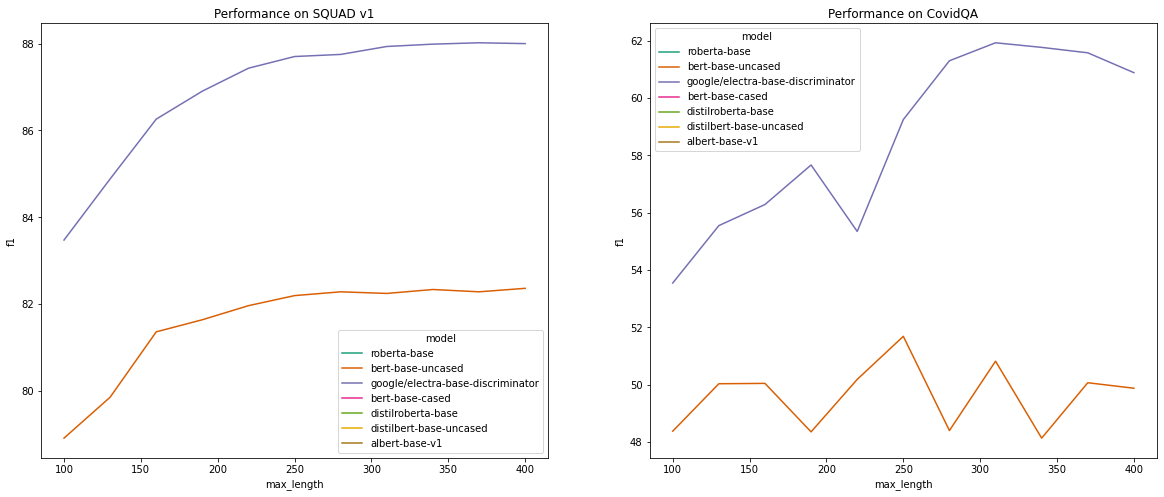

In [19]:
# case vs uncased
models_to_view = ['google/electra-base-discriminator', 'bert-base-uncased']
subset_squad = onSQUAD[onSQUAD.model.isin(models_to_view)]
subset_covidQA = onCovidQA[onCovidQA.model.isin(models_to_view)]

fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data = subset_squad, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
             #size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[0]).set(title = "Performance on SQUAD v1")
sns.lineplot(data = subset_covidQA, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
            # size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[1]).set(title = "Performance on CovidQA")

[Text(0.5, 1.0, 'Performance on CovidQA')]

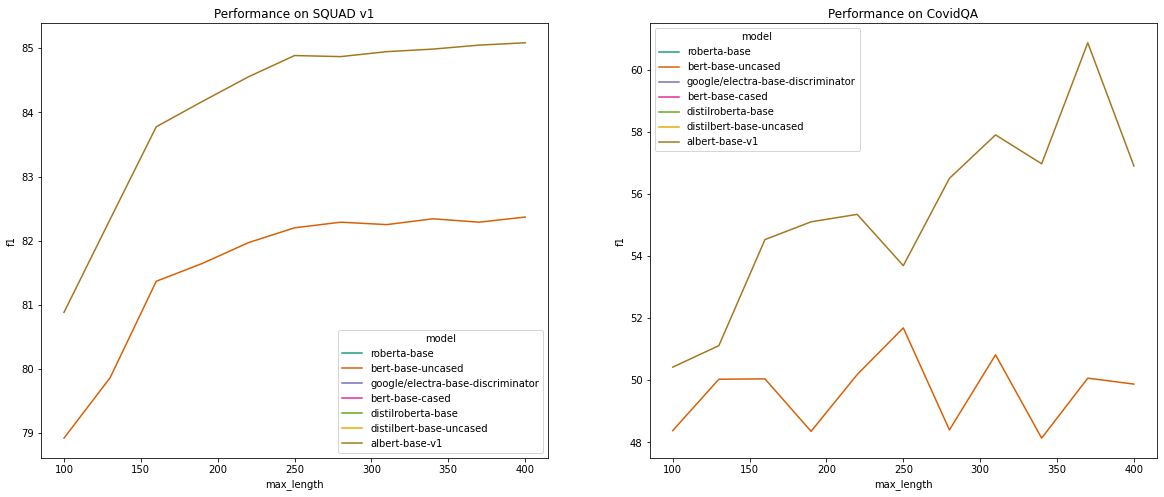

In [20]:
# case vs uncased
models_to_view = ['albert-base-v1', 'bert-base-uncased']
subset_squad = onSQUAD[onSQUAD.model.isin(models_to_view)]
subset_covidQA = onCovidQA[onCovidQA.model.isin(models_to_view)]

fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data = subset_squad, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
             #size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[0]).set(title = "Performance on SQUAD v1")
sns.lineplot(data = subset_covidQA, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
            # size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[1]).set(title = "Performance on CovidQA")

In [21]:
onSQUAD.model.unique()

array(['albert-base-v1', 'bert-base-cased', 'bert-base-uncased',
       'distilbert-base-uncased', 'distilroberta-base',
       'google/electra-base-discriminator', 'roberta-base'], dtype=object)

[Text(0.5, 1.0, 'Performance on CovidQA')]

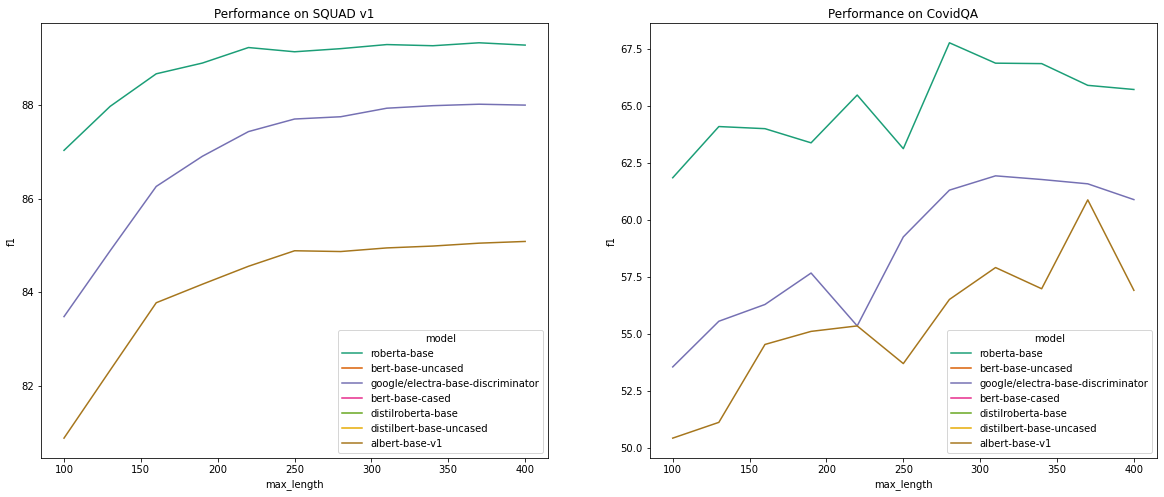

In [22]:
# case vs uncased
models_to_view = ['albert-base-v1', 'google/electra-base-discriminator', 'roberta-base']
subset_squad = onSQUAD[onSQUAD.model.isin(models_to_view)]
subset_covidQA = onCovidQA[onCovidQA.model.isin(models_to_view)]

fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data = subset_squad, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
             #size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[0]).set(title = "Performance on SQUAD v1")
sns.lineplot(data = subset_covidQA, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
            # size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[1]).set(title = "Performance on CovidQA")

[Text(0.5, 1.0, 'Performance on CovidQA')]

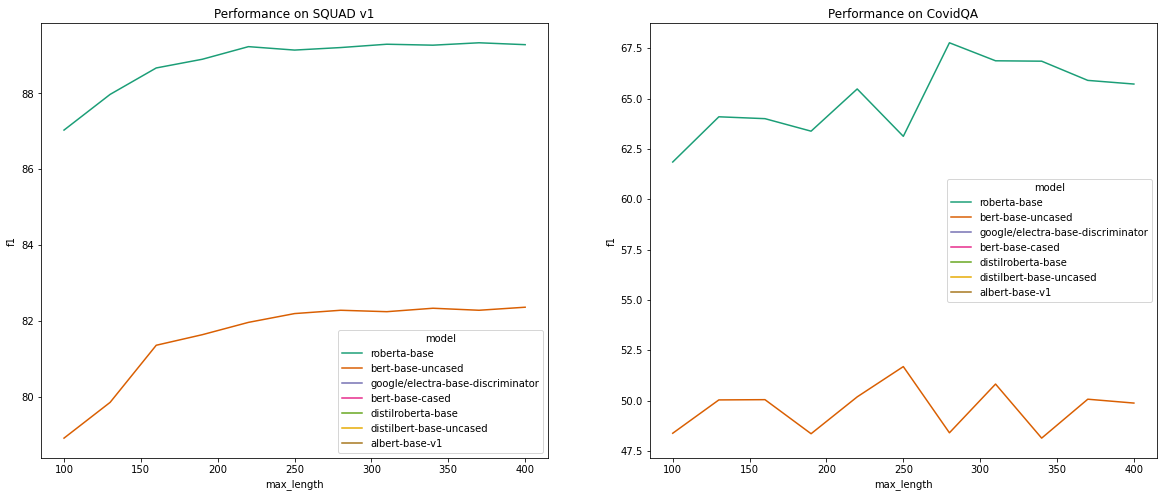

In [23]:
# case vs uncased
models_to_view = ['bert-base-uncased', 'roberta-base']
subset_squad = onSQUAD[onSQUAD.model.isin(models_to_view)]
subset_covidQA = onCovidQA[onCovidQA.model.isin(models_to_view)]

fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data = subset_squad, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
             #size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[0]).set(title = "Performance on SQUAD v1")
sns.lineplot(data = subset_covidQA, 
             x = "max_length", 
             y = "f1" , 
             hue = "model", 
            # size = "model_size",
             hue_order = model_size.keys(),
             ax = ax[1]).set(title = "Performance on CovidQA")